#Create datasets

In [ ]:
%%bash 
cd /content/drive/MyDrive/Bio_project
python main.py < script_inputs.txt

Give inputs

1000 fasta files


#Preproccesing Blast Description file

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bio_project/NC_008535.1/X33Z0KDD01R-Alignment-Descriptions.csv', header= 0)
for i in range(len(df['Accession  '])):
  df['Accession  '][i] = (df['Accession  '][i].split(',')).pop()[1:-2]
df['Accession  ']
df.to_csv('/content/drive/MyDrive/Bio_project/NC_008535.1/X33Z0KDD01R-Alignment-Descriptions.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#Define the number of clusters (elbow method) 

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Bio_project/NC_008535.1/6/kmers_dataset.csv')
df_n_genome = list(df1['Genome_Name'])
df1.pop('Genome_Name')

In [ ]:
import pandas as pd
from sklearn import preprocessing

x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

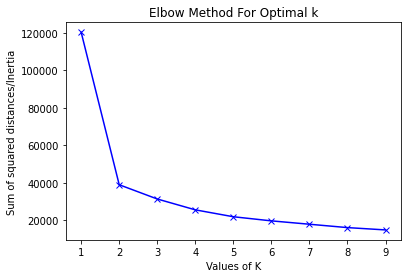

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, algorithm='full', n_init=100, max_iter=600)
 kmeans.fit_predict(df1)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

#Apply k-means clustering

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.manifold import Isomap
import os
from sklearn import preprocessing

In [22]:
def dataset_clustering(dataset_path, output_file, description_file):
  #import dataset
  df1 = pd.read_csv(dataset_path)
  df_n_genome = list(df1['Genome_Name'])
  df1.pop('Genome_Name')

  #normalize data
  
  x = df1.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df1 = pd.DataFrame(x_scaled)
  print(df1)

  #apply k-means clustering - 3 number of clusters
  kmeans = KMeans(n_clusters=3).fit(df1)
  kmeans_labels = kmeans.labels_

  # Dimensionality reduction (2D) using Isomap
  embedding = Isomap(n_components=2)
  X_transformed = embedding.fit_transform(df1)
  X_transformed = pd.DataFrame(X_transformed)

  #normalize
  X_transformed[0] = X_transformed[0]/max(X_transformed[0])
  X_transformed[1] = X_transformed[1]/max(X_transformed[1])
  
  #2D clustering plot
  plt.figure(figsize=(10,10))
  plt.scatter(X_transformed[0][kmeans_labels== 0], X_transformed[1][kmeans_labels==0], s=10, c='red')
  plt.scatter(X_transformed[0][kmeans_labels== 1], X_transformed[1][kmeans_labels==1], s=10, c='green')
  plt.scatter(X_transformed[0][kmeans_labels== 2], X_transformed[1][kmeans_labels==2], s=10, c='blue')
  plt.savefig('{}/clustering_isomap.png'.format(output_file))
  plt.show()

  #Match gene products with blast components (total score and E-value) by utilizing Accession column
  df2 = pd.read_csv(description_file, header=0)
  total_score = []
  E_value = []
  acc_length = []
  for i in df_n_genome:
    accession_index = df2.index[df2['Accession  '] == i].tolist()
    total_score.append(df2['Total Score'][accession_index[0]])
    E_value.append(df2['E value'][accession_index[0]])
    acc_length.append(df2['Acc. Len'][accession_index[0]])
  
  #insert to dataframe
  data = {'Total_score':total_score, 'E_value':E_value, 'Acc_length': acc_length}
  data2d = pd.DataFrame(data)

  #2D plot using blast metrics 
  blast_metrics= ['Total_score', 'E_value', 'Acc_length']

  for i in range(3):
    plt.figure(figsize=(11,11))
    plt.scatter(y=data2d[blast_metrics[i]][kmeans_labels== 0], x=data2d[blast_metrics[i-1]][kmeans_labels==0], s=10, c='red',  label = 'Cluster 1')
    plt.scatter(y=data2d[blast_metrics[i]][kmeans_labels==1], x=data2d[blast_metrics[i-1]][kmeans_labels==1],  c='green', s=10, label = 'Cluster 2')
    plt.scatter(y=data2d[blast_metrics[i]][kmeans_labels==2], x=data2d[blast_metrics[i-1]][kmeans_labels==2],  c='blue', s=10, label = 'Cluster 3')
    plt.ylabel(blast_metrics[i], fontsize=25)
    plt.xlabel(blast_metrics[i-1], fontsize=25) 
    plt.savefig('{0}/{1}_{2}'.format(output_file, blast_metrics[i], blast_metrics[-1]))

         0         1         2     ...      4093      4094      4095
0    0.748879  0.704545  0.820690  ...  0.867347  0.850394  0.734878
1    0.748879  0.704545  0.820690  ...  0.867347  0.850394  0.734878
2    0.748879  0.704545  0.820690  ...  0.867347  0.850394  0.734878
3    0.748879  0.704545  0.820690  ...  0.867347  0.850394  0.734878
4    0.748879  0.704545  0.820690  ...  0.867347  0.850394  0.734878
..        ...       ...       ...  ...       ...       ...       ...
995  0.790732  0.833333  0.800000  ...  0.731293  0.728346  0.720721
996  0.763827  0.803030  0.806897  ...  0.765306  0.751969  0.781210
997  0.817638  0.810606  0.793103  ...  0.758503  0.751969  0.785071
998  0.943199  0.772727  0.793103  ...  0.765306  0.736220  0.805663
999  0.763827  0.780303  0.806897  ...  0.724490  0.748031  0.779923

[1000 rows x 4096 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 46 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/

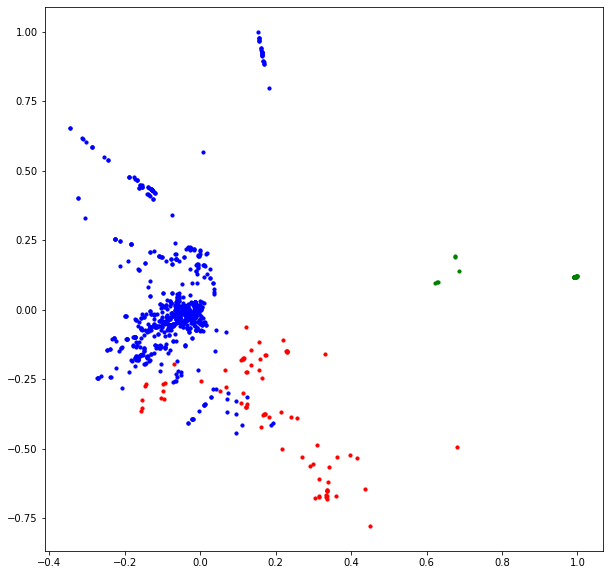

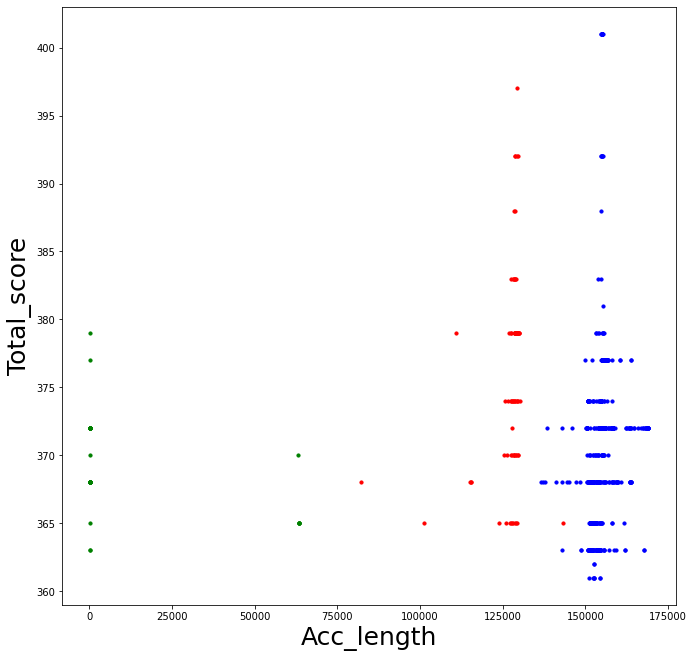

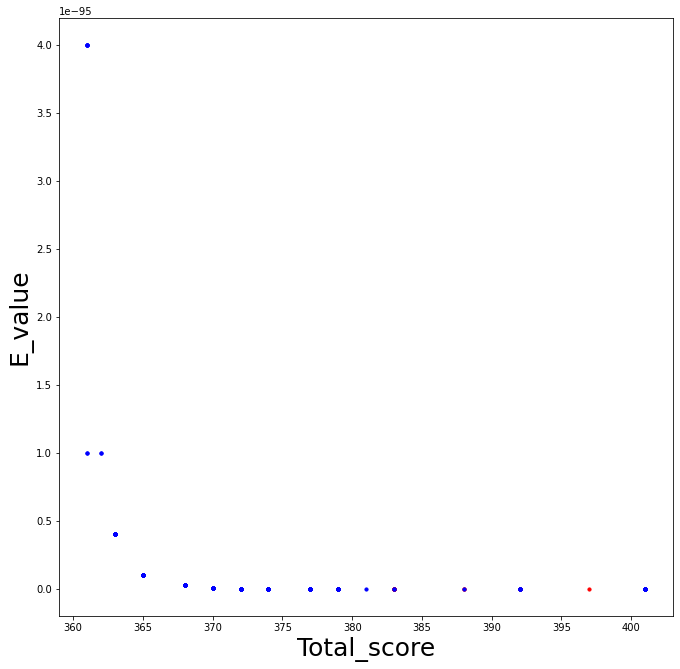

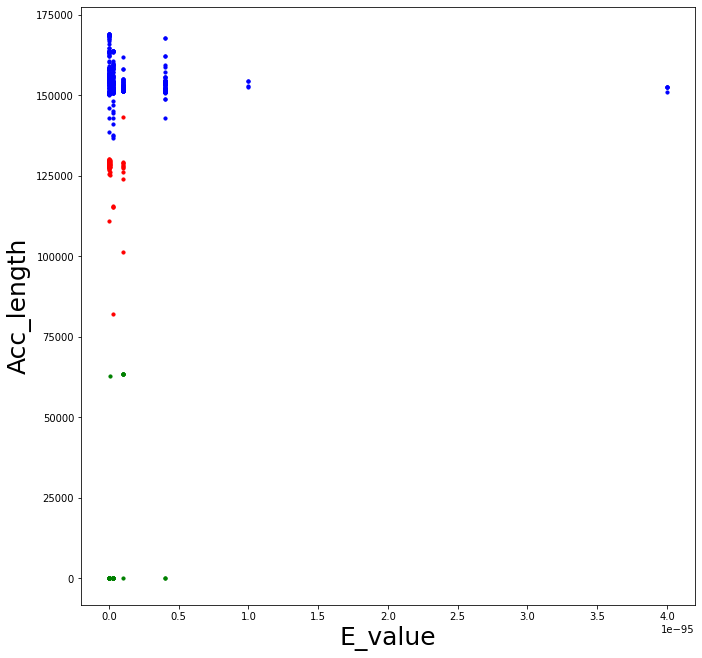

In [23]:
#6_mers dataset
dataset_clustering('/content/drive/MyDrive/Bio_project/NC_008535.1/6/kmers_dataset.csv', '/content/drive/MyDrive/Bio_project/NC_008535.1/6', '/content/drive/MyDrive/Bio_project/NC_008535.1/X33Z0KDD01R-Alignment-Descriptions.csv')

         0         1         2     ...      1021      1022      1023
0    0.828298  0.808581  0.859322  ...  0.858491  0.891107  0.867161
1    0.828298  0.808581  0.859322  ...  0.858491  0.891107  0.867161
2    0.828298  0.808581  0.859322  ...  0.858491  0.891107  0.867161
3    0.828298  0.808581  0.859322  ...  0.858491  0.891107  0.867161
4    0.828298  0.808581  0.859322  ...  0.858491  0.891107  0.867161
..        ...       ...       ...  ...       ...       ...       ...
995  0.859248  0.858086  0.822034  ...  0.772013  0.807623  0.801079
996  0.829772  0.877888  0.842373  ...  0.801887  0.803993  0.843560
997  0.865144  0.904290  0.820339  ...  0.790881  0.814882  0.846258
998  0.925571  0.877888  0.820339  ...  0.789308  0.807623  0.856372
999  0.831982  0.861386  0.849153  ...  0.781447  0.802178  0.842886

[1000 rows x 1024 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 37 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/

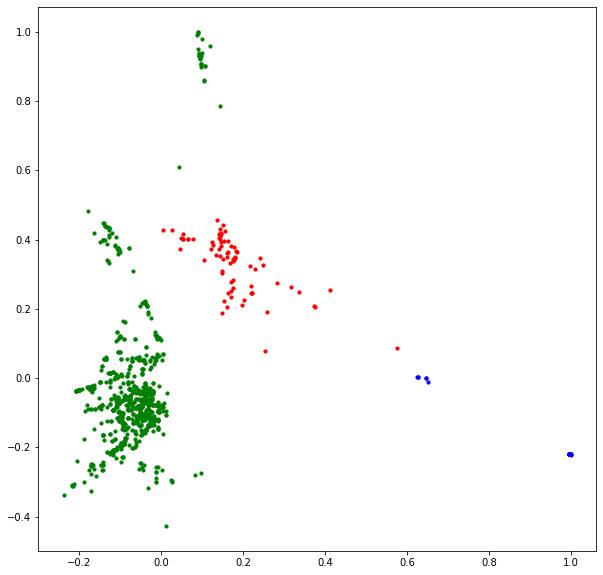

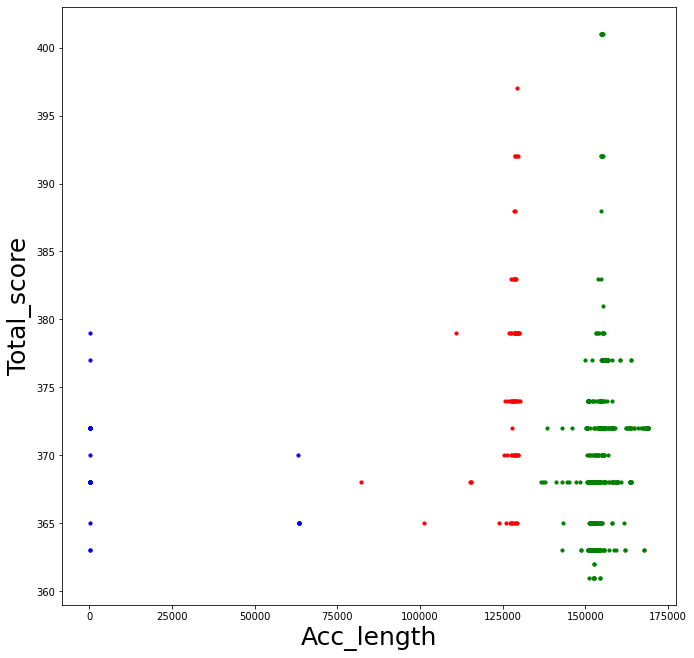

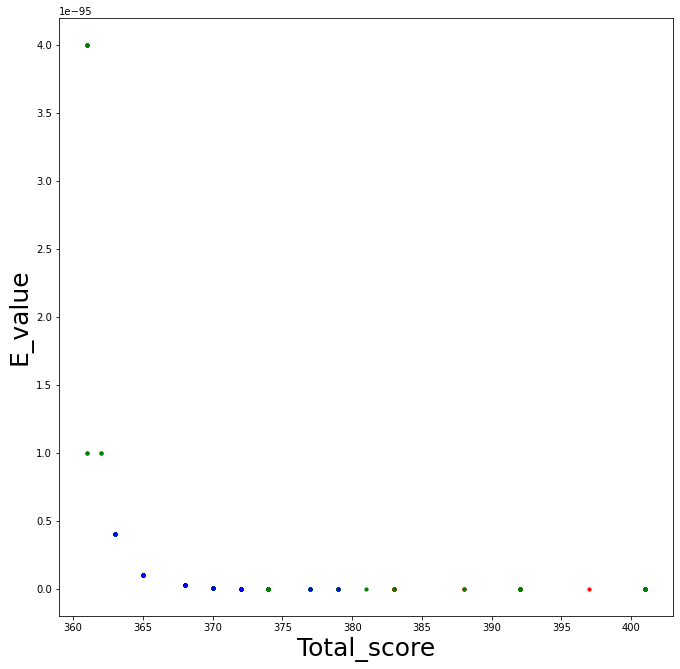

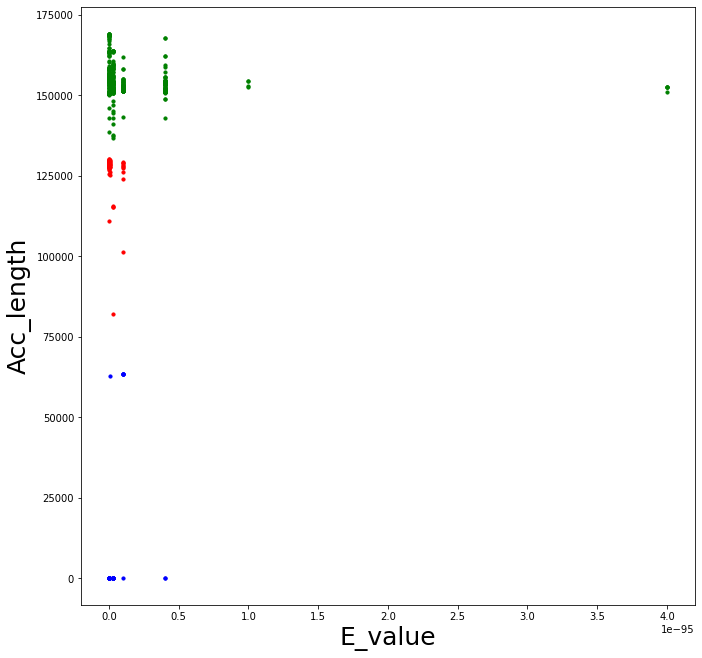

In [24]:
#5_mers dataset
dataset_clustering('/content/drive/MyDrive/Bio_project/NC_008535.1/5/kmers_dataset.csv', '/content/drive/MyDrive/Bio_project/NC_008535.1/5', '/content/drive/MyDrive/Bio_project/NC_008535.1/X33Z0KDD01R-Alignment-Descriptions.csv' )

          0         1         2    ...       253       254       255
0    0.866328  0.857311  0.908003  ...  0.891938  0.911788  0.950787
1    0.866328  0.857311  0.908003  ...  0.891938  0.911788  0.950787
2    0.866328  0.857311  0.908003  ...  0.891938  0.911788  0.950787
3    0.866328  0.857311  0.908003  ...  0.891938  0.911788  0.950787
4    0.866328  0.857311  0.908003  ...  0.891938  0.911788  0.950787
..        ...       ...       ...  ...       ...       ...       ...
995  0.866328  0.845519  0.859387  ...  0.783305  0.864949  0.883160
996  0.846362  0.854953  0.869110  ...  0.814180  0.871194  0.900569
997  0.865990  0.850236  0.874346  ...  0.795312  0.879781  0.904252
998  0.892047  0.836085  0.870606  ...  0.792453  0.880562  0.908269
999  0.850761  0.851415  0.873598  ...  0.805031  0.863388  0.900569

[1000 rows x 256 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 32 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/

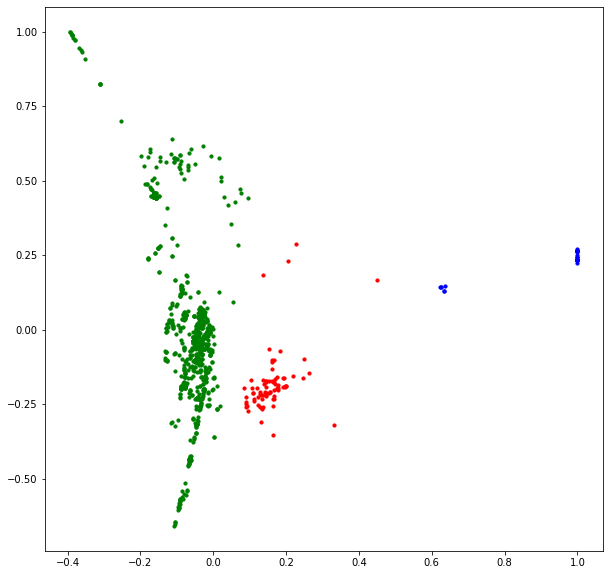

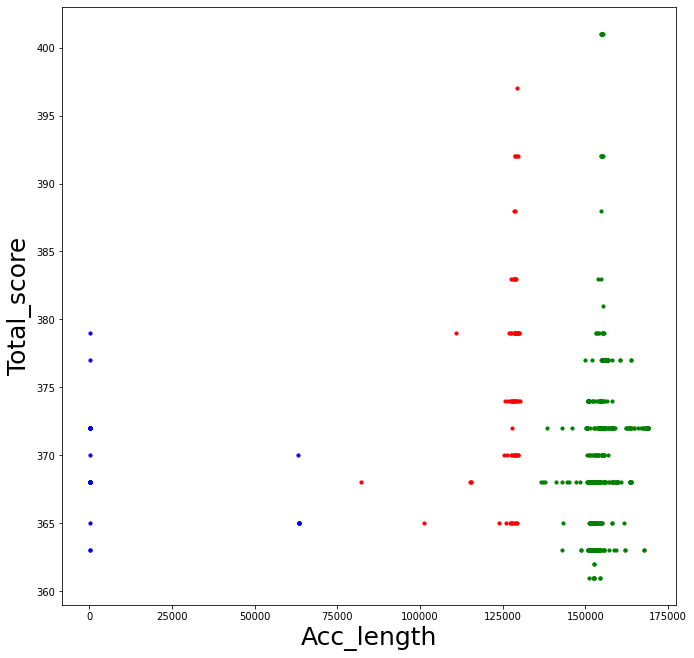

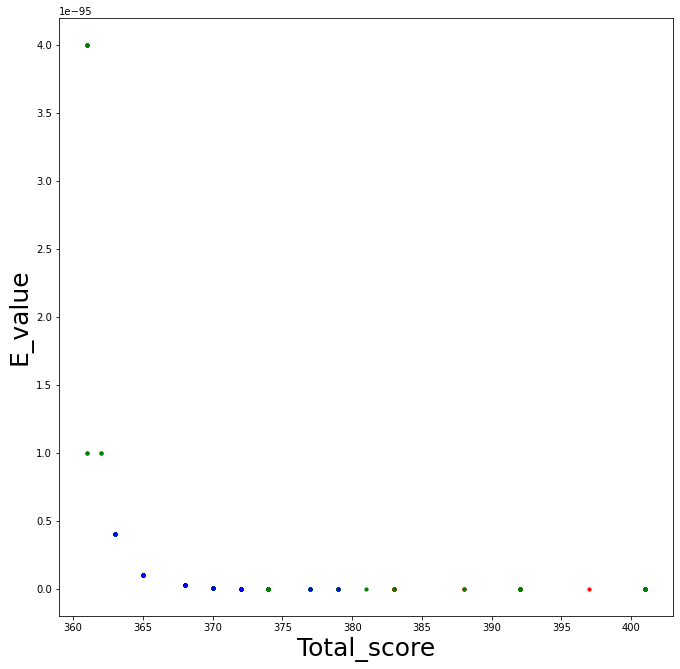

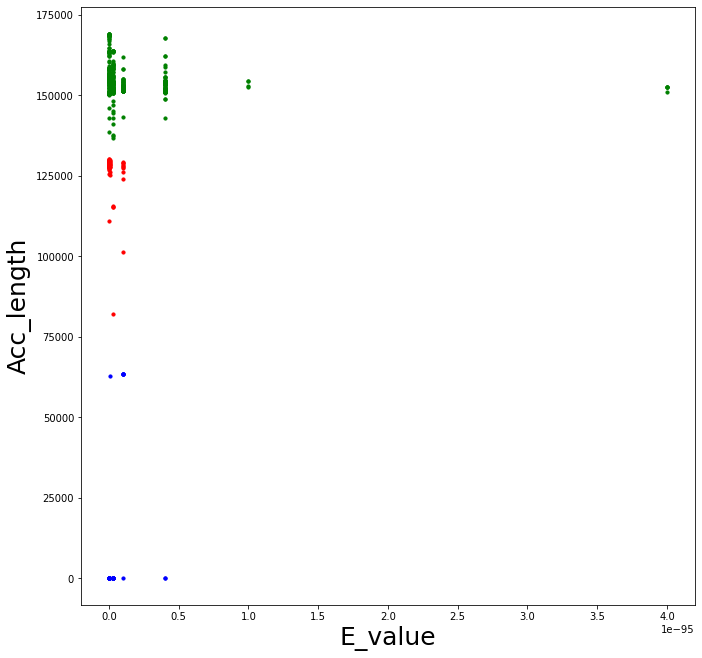

In [25]:
#4_mers dataset
dataset_clustering('/content/drive/MyDrive/Bio_project/NC_008535.1/4/kmers_dataset.csv', '/content/drive/MyDrive/Bio_project/NC_008535.1/4', '/content/drive/MyDrive/Bio_project/NC_008535.1/X33Z0KDD01R-Alignment-Descriptions.csv')

           0         1         2   ...        61        62        63
0    0.893994  0.903666  0.881228  ...  0.896637  0.912883  0.958117
1    0.893994  0.903666  0.881228  ...  0.896637  0.912883  0.958117
2    0.893994  0.903666  0.881228  ...  0.896637  0.912883  0.958117
3    0.893994  0.903666  0.881228  ...  0.896637  0.912883  0.958117
4    0.893855  0.903666  0.881228  ...  0.896637  0.912883  0.958117
..        ...       ...       ...  ...       ...       ...       ...
995  0.870112  0.883385  0.878621  ...  0.800656  0.896708  0.893886
996  0.857263  0.907566  0.881808  ...  0.825677  0.896141  0.904989
997  0.869832  0.887676  0.884705  ...  0.810500  0.909194  0.904849
998  0.877654  0.882995  0.883256  ...  0.808860  0.908910  0.906676
999  0.860615  0.906396  0.884125  ...  0.822806  0.893587  0.904849

[1000 rows x 64 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 16 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/

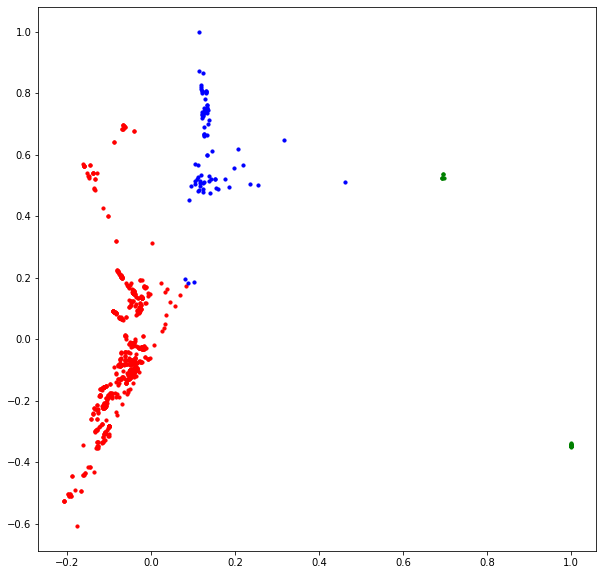

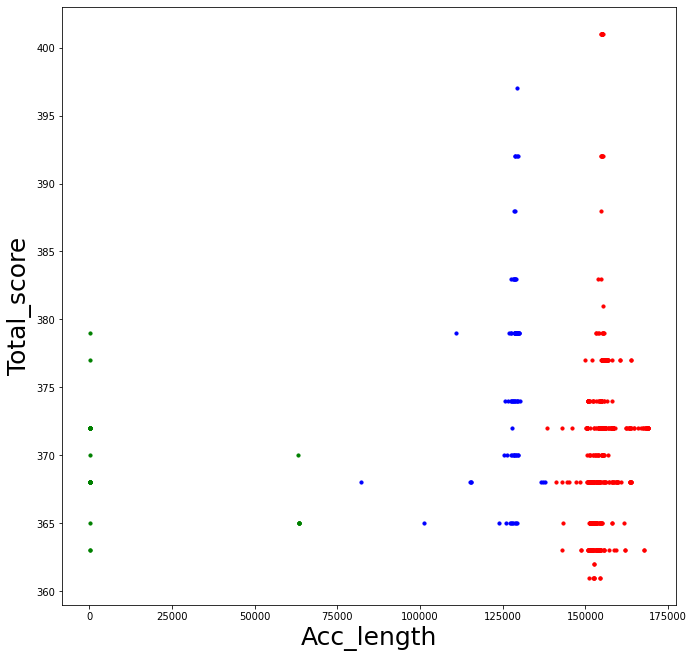

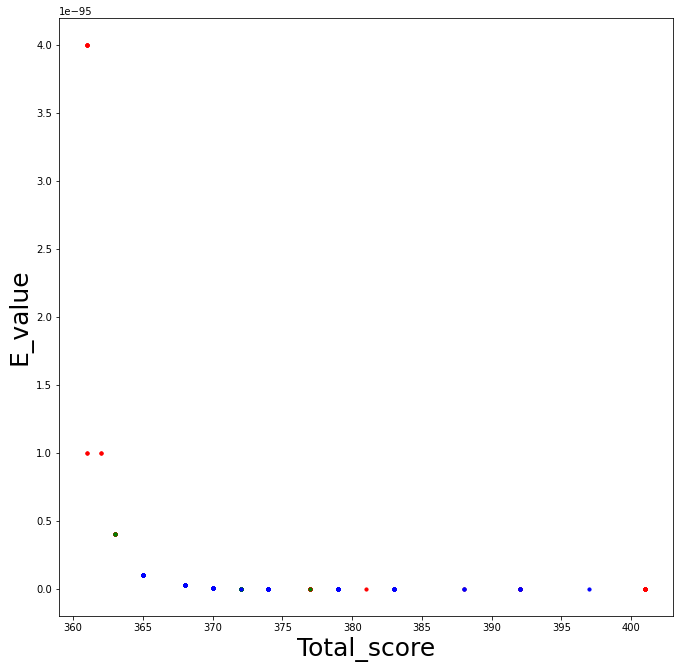

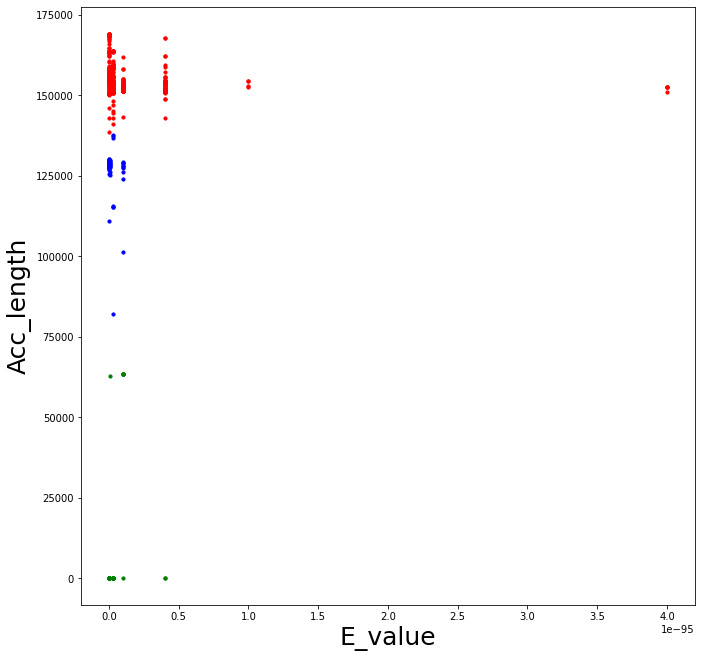

In [26]:
#3_mers dataset
dataset_clustering('/content/drive/MyDrive/Bio_project/NC_008535.1/3/kmers_dataset.csv', '/content/drive/MyDrive/Bio_project/NC_008535.1/3', '/content/drive/MyDrive/Bio_project/NC_008535.1/X33Z0KDD01R-Alignment-Descriptions.csv')